# Tipos Básicos de Grafos

Neste notebook, exploramos recursos da **JGraphT** para analisar propriedades de um grafo, conhecer geradores padrão de grafos e travessia do grafo.

A documentação sobre **Python bindings** encontra-se no link abaixo:

https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/

# Instalação da JGraphT e Importação de Pacotes e Arquivos deste Notebook

In [ ]:
# Instalando a JgraphT para uso neste notebook
!pip install jgrapht

# Importando a JgraphT
import jgrapht

# Importanto funções para print de vértices e arestas
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/getutil.py
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/drawutil.py
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/importutil.py
from getutil import get_edge_labels, get_partitions
from importutil import import_gml
from drawutil import draw_graph

# Download de arquivos de grafos usados neste notebook
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/bp1.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/cubo.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/acyclic.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/K5.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/pseudograph-Aula02.gml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-13 17:35:55--  https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/getutil.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7413 (7.2K) [text/plain]
Saving to: ‘getutil.py.1’

getutil.py.1        100%[===================>]   7.24K  --.-KB/s    in 0s      

2022-10-13 17:35:55 (45.3 MB/s) - ‘getutil.py.1’ saved [7413/7413]

--2022-10-13 17:35:55--  https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/drawutil.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com

# Testando Propriedades em um Grafo

JGraphT apresenta uma coleção de funções para computar várias propriedades sobre um grafo no pacote [jgrapht.properties](https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.1/api/properties.html#structural-properties). Dentre elas, podemos destacar a função **has_multipleedges** que determina se um grafo passado como parâmetro possui arestas paralelas. O método **has_selfloops** determina se um grafo possui arestas loop.  O método **is_strongly_connected** determina se um grafo é conectado. O método **is_bipartite** determina se um grafo é bipartido. O método **is_complete** determina se um grafo é completo. Dentre outros métodos, que testam conceitos que serão apresentados em aulas posteriores.

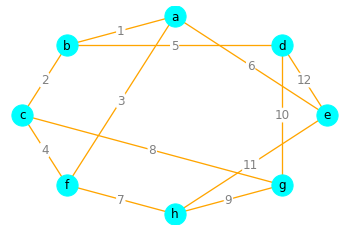

{'6:{e,a}', '7:{h,f}', '12:{e,d}', '9:{h,g}', '4:{c,f}', '1:{a,b}', '2:{b,c}', '3:{f,a}', '11:{e,h}', '8:{g,c}', '10:{g,d}', '5:{d,b}'}
Grafo possui arestas pararelas? False
Grafo possui arestas loop? False
O Grafo é conectado? True
O Grafo é bipartido? True
O Grafo é completo? False


In [ ]:
#@title  { run: "auto", vertical-output: true }
filename = "cubo.gml" #@param ["bp1.gml", "cubo.gml", "acyclic.gml", "K5.gml", "pseudograph-Aula02.gml"]
layout = "circular" #@param ["random", "circular", "fruchterman_reingold", "fruchterman_reingold_indexed"]

from jgrapht.properties import has_multipleedges
from jgrapht.properties import has_selfloops
from jgrapht.properties import is_strongly_connected
from jgrapht.properties import is_bipartite
from jgrapht.properties import is_complete

v_g0 = {}
e_g0 = {}
g0 = jgrapht.create_graph(directed=False,weighted=False,
                          allowing_multiple_edges=True,
                          allowing_self_loops=True)
import_gml(g0,v_g0,e_g0,filename)
if not has_multipleedges(g0) and not has_selfloops(g0):
  draw_graph(g0,layout,vlabel='label',v_attrs=v_g0,
             elabel='label',e_attrs=e_g0)
print(get_edge_labels(g0,v_attrs=v_g0,e_attrs=e_g0))

# Testando propriedades de G
print("Grafo possui arestas pararelas? {}".
      format(bool(has_multipleedges(g0))))
print("Grafo possui arestas loop? {}".
      format(bool(has_selfloops(g0))))
print("O Grafo é conectado? {}".
      format(bool(is_strongly_connected(g0))))
print("O Grafo é bipartido? {}".
      format(bool(is_bipartite(g0))))
print("O Grafo é completo? {}".
      format(bool(is_complete(g0))))

# Geradores de Grafos

A JGraphT disponibiliza geradores automáticos de grafos com base em vários modelos conhecidos através do pacote [Generators](https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/api/generators.html). Abaixo ilustramos alguns deles.

{0, 1, 2, 3, 4, 5, 6, 7, 8}
{(4, 7), (1, 3), (4, 8), (5, 6), (0, 2), (2, 8), (0, 7), (1, 6), (3, 7), (2, 5), (0, 3), (5, 8), (1, 2), (6, 7), (1, 5), (3, 6), (0, 4), (2, 6), (4, 5), (1, 4), (0, 5), (2, 3), (0, 8), (3, 5), (0, 1), (2, 7), (7, 8), (4, 6), (6, 8), (5, 7), (3, 8), (0, 6), (1, 8), (1, 7), (3, 4), (2, 4)}


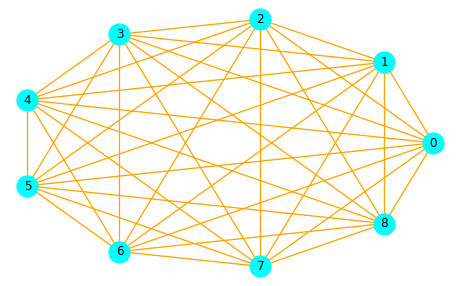

In [ ]:
#@title Grafo Completo { run: "auto", vertical-output: true }
size = 10 #@param {type:"slider", min:1, max:10, step:1}
# GRAFO COMPLETO

#Criando uma instância vazia
cgraph = jgrapht.create_graph(directed=False,weighted=False)

# Gerando um grafo completo com n vértices
jgrapht.generators.complete_graph(cgraph,size)

print(cgraph.vertices)
print({cgraph.edge_tuple(e)[0:2] for e in cgraph.edges})
draw_graph(cgraph,layout='circular',vertexid_aslabel=True)

{0, 1, 2, 3}
set()


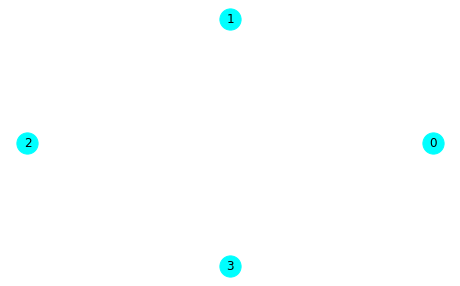

In [ ]:
#@title Grafo Vazio { run: "auto", vertical-output: true }
size = 9 #@param {type:"slider", min:1, max:10, step:1}
# GRAFO VAZIO

#Criando uma instância vazia
vgraph = jgrapht.create_graph(directed=False,weighted=False)

# Gerando um grafo completo com n vértices
jgrapht.generators.empty_graph(vgraph,size)

print(vgraph.vertices)
print({vgraph.edge_tuple(e)[0:2] for e in vgraph.edges})
draw_graph(vgraph,layout='circular',vertexid_aslabel=True)

{0, 1, 2, 3, 4, 5, 6}
{(2, 6), (1, 4), (0, 6), (1, 5), (0, 5), (1, 6), (3, 6), (0, 4), (2, 5), (3, 4), (2, 4), (3, 5)}


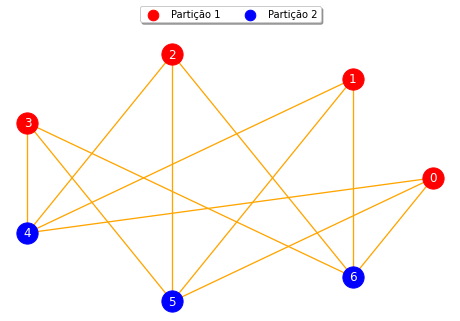

In [ ]:
#@title Grafo Bipartido Completo { run: "auto", vertical-output: true }
p1 = 4 #@param {type:"slider", min:1, max:10, step:1}
p2 = 3 #@param {type:"slider", min:1, max:10, step:1}
# GRAFO BIPARTIDO COMPLETO

#Criando uma instância vazia
bcgraph = jgrapht.create_graph(directed=False,weighted=False)

# Gerando um grafo bipartido completo passando o tamanho das partições
jgrapht.generators.complete_bipartite_graph(bcgraph,p1,p2)

print(bcgraph.vertices)
print({bcgraph.edge_tuple(e)[0:2] for e in bcgraph.edges})

# Encontra as partições de um grafo bipartido
partition1,partition2 = get_partitions(bcgraph)

draw_graph(bcgraph,vertexid_aslabel=True,vertex_font_color="white",
           vset=[partition1,partition2],vsetcolor=["red","blue"],
           vsetlabel=["Partição 1","Partição 2"])

{0, 1, 2, 3, 4, 5, 6}
{(0, 1), (1, 2), (4, 5), (5, 6), (2, 3), (3, 4)}


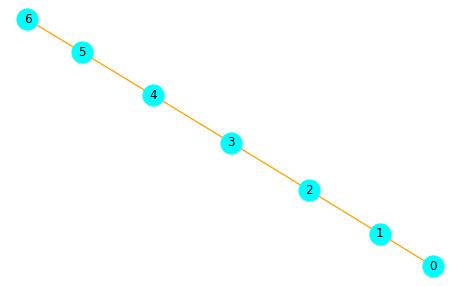

In [ ]:
#@title Grafo Caminho { run: "auto", vertical-output: true }
qvertices = 7 #@param {type:"slider", min:1, max:20, step:1}
# GRAFO CAMINHO

#Criando uma instância vazia
pgraph = jgrapht.create_graph(directed=False,weighted=False)

# Gerando um grafo caminho de n vértices
jgrapht.generators.linear(pgraph,qvertices)

print(pgraph.vertices)
print({pgraph.edge_tuple(e)[0:2] for e in pgraph.edges})
draw_graph(pgraph,layout='fruchterman_reingold_indexed',vertexid_aslabel=True)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
{(0, 1), (1, 2), (7, 8), (6, 7), (10, 11), (4, 5), (5, 6), (12, 13), (11, 12), (8, 9), (9, 10), (2, 3), (3, 4), (13, 0)}


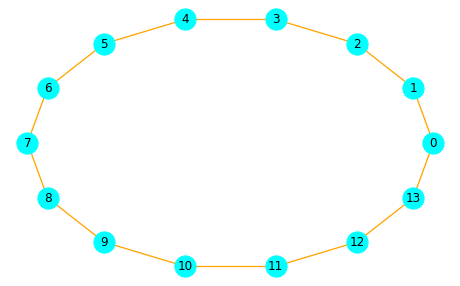

In [ ]:
#@title Grafo Ciclo { run: "auto", vertical-output: true }
qvertices = 14 #@param {type:"slider", min:3, max:20, step:1}
# GRAFO Ciclo

#Criando uma instância vazia
cigraph = jgrapht.create_graph(directed=False,weighted=False)

# Gerando um grafo caminho de n vértices
jgrapht.generators.ring_graph(cigraph,qvertices)

print(cigraph.vertices)
print({cigraph.edge_tuple(e)[0:2] for e in cigraph.edges})
draw_graph(cigraph,layout='circular',vertexid_aslabel=True)

Grafo Ciclo:
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
{(0, 1), (1, 2), (7, 8), (6, 7), (10, 11), (4, 5), (5, 6), (12, 13), (11, 12), (8, 9), (9, 10), (2, 3), (3, 4), (13, 0)}
Complemento:
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
{(6, 9), (7, 12), (0, 7), (1, 6), (0, 10), (3, 7), (2, 5), (1, 11), (5, 8), (6, 10), (0, 4), (4, 10), (2, 6), (5, 11), (10, 13), (3, 12), (1, 12), (8, 12), (2, 11), (6, 13), (3, 11), (4, 12), (2, 12), (1, 5), (0, 11), (3, 6), (1, 10), (6, 11), (0, 5), (0, 8), (4, 11), (3, 5), (2, 7), (9, 13), (5, 10), (4, 6), (5, 7), (0, 2), (1, 3), (8, 13), (4, 8), (2, 8), (5, 13), (7, 11), (3, 10), (8, 10), (4, 13), (2, 13), (9, 11), (11, 13), (1, 4), (0, 12), (3, 9), (1, 9), (6, 8), (7, 13), (0, 6), (1, 7), (0, 9), (2, 4), (9, 12), (5, 9), (4, 7), (0, 3), (4, 9), (2, 9), (5, 12), (10, 12), (7, 10), (3, 13), (1, 13), (8, 11), (2, 10), (6, 12), (7, 9), (3, 8), (1, 8)}


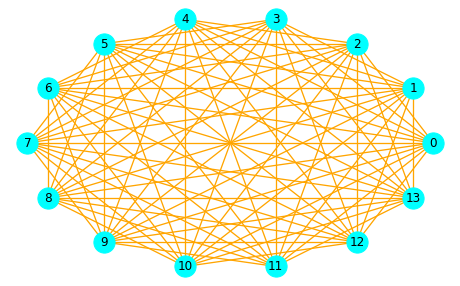

In [ ]:
#@title Complemento { run: "auto", vertical-output: true }
# COMPLEMENTO

#Criando uma instância vazia
compgraph = jgrapht.create_graph(directed=False,weighted=False)

# Gerando o complemento do grafo ciclo 'cigraph' criado anteriormente
jgrapht.generators.complement_graph(compgraph,cigraph)

print("Grafo Ciclo:")
print(cigraph.vertices)
print({cigraph.edge_tuple(e)[0:2] for e in cigraph.edges})
print("Complemento:")
print(compgraph.vertices)
print({compgraph.edge_tuple(e)[0:2] for e in compgraph.edges})
draw_graph(compgraph,layout='circular',vertexid_aslabel=True)


{0, 1, 2, 3, 4, 5, 6, 7}
{(0, 1), (7, 3), (4, 5), (6, 0), (0, 7), (2, 0), (0, 5), (0, 4), (0, 3), (3, 5)}


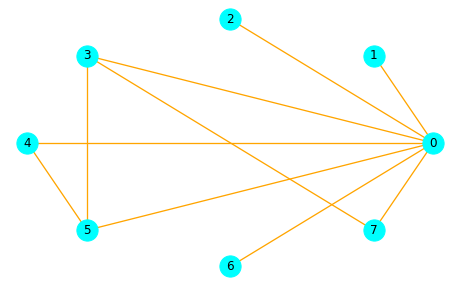

In [ ]:
#@title Random { run: "auto", vertical-output: true }
# RANDOM

#Criando uma instância vazia
rgraph = jgrapht.create_graph(directed=False,weighted=False)

# Gerando um grafo randomico com n vértices e m arestas
jgrapht.generators.gnm_random_graph(rgraph,8,10)

print(rgraph.vertices)
print({rgraph.edge_tuple(e)[0:2] for e in rgraph.edges})
draw_graph(rgraph,layout='circular',vertexid_aslabel=True)

# Travessia do Grafo (Graph Traversal)

Travessia de grafo (*graph traversal*) refere-se ao processo de visitar cada vértice de um grafo observando o padrão de conexão entre eles. Usualmente, o próximo vértice a visitar é um vizinho do vértice corrente (ou existe um passeio entre eles). Em um grafo desconectado, os vértices de cada componente são todos visitados antes que os vértices de outros componentes sejam visitados (ver acyclic.gml no exemplo abaixo).
A JGraphT dá suporte a implementação de alguns algoritmos conhecidos retornando um iterador ([pacote traversal](https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/api/traversals.html)). Estes algoritmos serão estudados em mais detalhes em aulas posteriores.

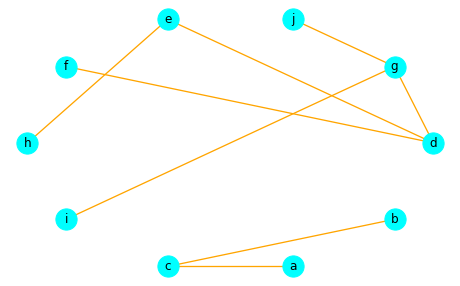

BFS
d g e f j i h c a b 
DFS
d f e h g i j c b a 
MAX
d g j e f h i c a b 

In [ ]:
#@title   { run: "auto", vertical-output: true }
filename = "acyclic.gml" #@param ["bp1.gml", "cubo.gml", "acyclic.gml", "K5.gml", "pseudograph-Aula02.gml"]
layout = "circular" #@param ["random", "circular", "fruchterman_reingold", "fruchterman_reingold_indexed"]
v_attrs = {}
e_attrs = {}
g = jgrapht.create_graph(directed=False,weighted=False,
                         allowing_multiple_edges=True,
                         allowing_self_loops=True)
import_gml(g,v_attrs,e_attrs,filename)
draw_graph(g,layout,vlabel='label',v_attrs=v_attrs,elabel='label',e_attrs=e_attrs)

bfs = jgrapht.traversal.bfs_traversal(g)
print("BFS")
for v in bfs:
  print(v_attrs[v]['label'],end=' ')
dfs = jgrapht.traversal.dfs_traversal(g)
print("\nDFS")
for v in dfs:
  print(v_attrs[v]['label'],end=' ')
max = jgrapht.traversal.max_cardinality_traversal(g)
print("\nMAX")
for v in max:
  print(v_attrs[v]['label'],end=' ')

# Exercício

Construa uma função que recebe um grafo como entrada e determina se duas partições de vértices são conectadas.

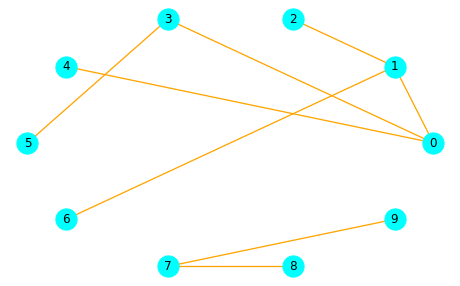

False

In [ ]:
#@title   { run: "auto", vertical-output: true }
filename = "acyclic.gml" #@param ["bp1.gml", "cubo.gml", "acyclic.gml", "K5.gml", "pseudograph-Aula02.gml"]
layout = "circular" #@param ["random", "circular", "fruchterman_reingold", "fruchterman_reingold_indexed"]
v_g1 = {}
e_g1 = {}
g1 = jgrapht.create_graph(directed=False,weighted=False,
                          allowing_multiple_edges=True,
                          allowing_self_loops=True)
import_gml(g1,v_g1,e_g1,filename)
draw_graph(g1,layout,vertexid_aslabel=True)

def connectedp (g,p1,p2):
  for i in p1:
    for c in p2:
      if(g1.contains_edge_between(i,c)):
        return True
  return False

connectedp (g1,[0,1,2,3,4],[7])

In [ ]:
# Testando se os vértices 0 e 1 estão relacionados no grafo g criado acima.
# (execute o código anterior antes deste para criar o grafo)
# Observe que tanto faz testar a aresta (1,0) quanto (0,1) já
# que o grafo é não direcionado.
if (g1.contains_edge_between(0,1) and g1.contains_edge_between(1,0)):
  print(True)

True



A interface *Graph* também disponibiliza métodos para consultarmos se vértices estão ou não relacionados (*contains_edge_between*, *edges_between*), de quais arestas um vértice é terminal (*edges_of*), qual é o outro vértice terminal de uma aresta (*opposite*) e o grau de um vértice (*degree_of*), dentre outras. Existem outras funções especializadas para grafos direcionados e grafos ponderados. Abaixo, ilustram os um teste para mostrar que em grafos não-direcionados a ordem dos terminais não importa.


A interface *Graph* também disponibiliza métodos para consultarmos se vértices estão ou não relacionados (*contains_edge_between*, *edges_between*), de quais arestas um vértice é terminal (*edges_of*), qual é o outro vértice terminal de uma aresta (*opposite*) e o grau de um vértice (*degree_of*), dentre outras. Existem outras funções especializadas para grafos direcionados e grafos ponderados. Abaixo, ilustram os um teste para mostrar que em grafos não-direcionados a ordem dos terminais não importa.


A interface *Graph* também disponibiliza métodos para consultarmos se vértices estão ou não relacionados (*contains_edge_between*, *edges_between*), de quais arestas um vértice é terminal (*edges_of*), qual é o outro vértice terminal de uma aresta (*opposite*) e o grau de um vértice (*degree_of*), dentre outras. Existem outras funções especializadas para grafos direcionados e grafos ponderados. Abaixo, ilustram os um teste para mostrar que em grafos não-direcionados a ordem dos terminais não importa.